# Machine Learning Online Class - Exercise 2: Logistic Regression

Instructions
------------

* plotData.m - Function to plot 2D classification data
* sigmoid.m - Sigmoid Function
* costFunction.m - Logistic Regression Cost Function
* predict.m - Logistic Regression Prediction Function
* costFunctionReg.m - Regularized Logistic Regression Cost

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.optimize as op

# Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. <br>
<br>
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. <br>
<br>
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in ex2.m will guide you through the exercise.

## Part 1: Visualizing the data

In [455]:
data = pd.read_csv('ex2data1.txt', sep =',', names= ['x1', 'x2', 'y'])

In [456]:
X, y = data[['x1', 'x2']].values,  data.y.values

In [444]:
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [86]:
data.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part of ex2.m, the code will load the data and display it on a 2-dimensional plot by calling the function plotData.<br><br>
You will now complete the code in plotData so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

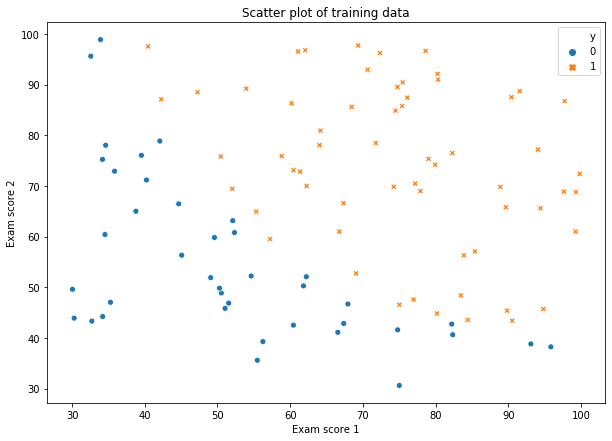

In [87]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x = 'x1', y= 'x2', hue="y", style="y", data = data);
ax.set(xlabel='Exam score 1', ylabel='Exam score 2', title='Scatter plot of training data')
plt.show()

## 1.2 Implementation
##  Part 1: Sigmoid function

efore you start with the actual cost function, recall that the logistic regres- sion hypothesis is defined as:<br>
<br>
\begin{equation*}
h_θ(x) = g(θ^T x)
\end{equation*}
<br>
where function g is the sigmoid function. The sigmoid function is defined as:
<br>
\begin{equation*}
g(z) = \frac{1}{(1+e^{−z})}
\end{equation*}
<br>

Your first step is to implement this function in sigmoid.m so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [88]:
def sigmoid(z):
    g = 1/(1+ np.exp(-z))
    return g

In [89]:
sigmoid(0)

0.5

In [90]:
sigmoid(10)

0.9999546021312976

In [91]:
sigmoid(10000)

1.0

##  Part 1:  Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient.


Recall that the cost function in logistic regression is
<br>
\begin{equation*}
J(\theta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\theta (x_i) – (1 – y_i) log(1-h_\theta (x_i))]
\end{equation*}
<br>
and the gradient of the cost is a vector of the same length as θ where the jth
element (for j = 0,1,...,n) is defined as follows:
<br>
\begin{equation*}
\frac{dJ(\theta)}{d\theta_j} = \frac{1}{m} \sum_{i=1}^N(h_\theta(x_i)-y_i)x_{ij}
\end{equation*}
<br>

Note that while this gradient looks identical to the linear regression gra- dient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).
Once you are done, ex2.m will call your costFunction using the initial parameters of θ. You should see that the cost is about 0.693.

In [457]:
X = np.append(np.ones((X.shape[0], 1)),X, axis=1)

In [458]:
m,n = X.shape

In [459]:
initial_theta = np.zeros((n, 1))

In [104]:
initial_theta = np.array([.0, .0, .0])

In [105]:
initial_theta

array([0., 0., 0.])

In [106]:
initial_theta.reshape((n,1))

array([[0.],
       [0.],
       [0.]])

In [107]:
test_theta = np.array([-24, 0.2, 0.2])

In [220]:
def costFunctionGrad(theta, x, y):
    m,n = x.shape
    theta = theta.reshape((n,1)) 
    h = sigmoid(np.dot(x, theta))
    y = y.reshape((m, 1))
    J = np.sum((-y*np.log(h)) - (1-y)*np.log(1- h))/m
    grad = (np.dot((x.T),h-y))/m
    return J, grad

In [221]:
def costFunction(theta, x, y):
    m,n = x.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    h = sigmoid(x.dot(theta))
    cost = y * np.log(h).reshape((m,1)) + (1 - y) * np.log(1-h).reshape((m,1))
    J = -((np.sum(cost))/m)
    return J

In [54]:
def grads(theta, x, y):
    m,n = x.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    h = sigmoid(np.dot(x, theta))
    grad = (np.dot((x.T),h-y))/m
    return grad.flatten()

In [222]:
costFunction(x = X, y = y, theta = test_theta)

0.21833019382659796

In [223]:
costFunction(x = X, y = y, theta = initial_theta)

0.6931471805599453

### 1.2.3 Learning parameters using fminunc (fmin_tnc)

In [461]:
m, n = X.shape
initial_theta = np.zeros((n, 1))

# Minimize a function with variables subject to bounds, 
# using gradient information in a truncated Newton algorithm.
with_ortimisation = op.fmin_tnc(func = costFunction,
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 fprime = grads)
with_ortimisation

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

In [460]:
# Unconstrained minimization of a function using the Newton-CG method.
op.fmin_ncg(f = costFunction,
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 fprime = grads)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 28
         Function evaluations: 71
         Gradient evaluations: 244
         Hessian evaluations: 0


array([-25.15083612,   0.20614774,   0.20138667])

In [462]:
op.fmin_tnc(func = costFunction, x0 = test_theta, 
                                 args = (X, y),
                                 fprime = grads)

(array([-25.16113826,   0.20623012,   0.20147005]), 23, 1)

In [463]:
new_test = np.array([[0.1], [.3], [-.3]])

In [464]:
op.fmin_tnc(func = costFunction, x0 = new_test, 
                                 args = (X, y),
                                 fprime = grads)

(array([-25.16022699,   0.20623726,   0.20144543]), 57, 1)

In [256]:
my_theta = op.fmin_tnc(func = costFunction, x0 = test_theta, 
                                 args = (X, y),
                                 fprime = grads)[0]

In [257]:
my_theta

array([-25.16113826,   0.20623012,   0.20147005])

### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.<br>
<br>
Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in predict.m. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector θ.<br>
<br>
After you have completed the code in predict.m, the ex2.m script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [284]:
def predict(theta, x):
    
    z = sigmoid(np.dot(X, theta.reshape(x.shape[1], 1)))
    pred = (z>=0.5)*1
    return pred

In [285]:
my_predict = predict(my_theta, X)

In [289]:
accuracy  = np.sum(my_predict == y)/len(y)

In [290]:
accuracy

0.89

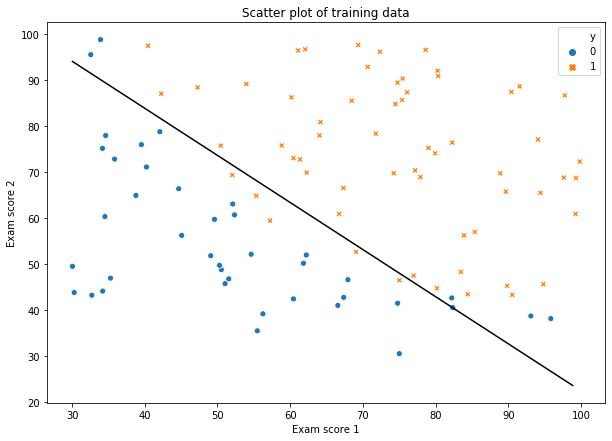

In [291]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x = 'x1', y= 'x2', hue="y", style="y", data = data);
ax.set(xlabel='Exam score 1', ylabel='Exam score 2', title='Scatter plot of training data')

# !!! одолжила, нужно разобраться
minx = np.min(X[:, 1])
maxx = np.max(X[:, 2])
y1 = -(my_theta[0] + my_theta[1]*minx) / my_theta[2]
y2 = -(my_theta[0] + my_theta[1]*maxx) / my_theta[2]


plt.plot([minx, maxx], [y1, y2], c='black')
plt.show()

# Part 2: Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.<br>
<br>
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [326]:
data = pd.read_csv('ex2data2.txt', sep =',', names= ['x1', 'x2', 'y'])

In [308]:
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [327]:
X, y = data[['x1', 'x2']].values,  data.y.values

### 2.1 Visualizing the data

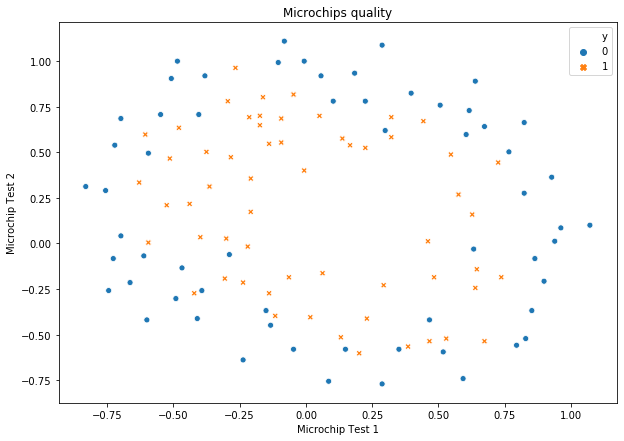

In [328]:
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x = 'x1', y= 'x2', hue="y", style="y", data = data)
ax.set(xlabel='Microchip Test 1', ylabel='Microchip Test 2', title='Microchips quality')
plt.show()

## Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function mapFeature.m, we will map the features into all polynomial terms of x1 and x2 up to the sixth power.<br>
<br>
As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.<br>
<br>
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [311]:
def mapFeature(X1, X2, degree):
    X1 = X1.reshape((len(X1), 1))
    X2 = X2.reshape((len(X2), 1))
    new = np.ones((len(X1), 1))
    for i in range(1, degree+1):
        for j in range(0,i+1):
            pol = (X1**(i-j)*X2**j)
#             print(i-j, j)
            new = np.append(new, pol, axis=1) 
#             print('end')            
    return new

In [329]:
X_pol = mapFeature(X1=X[:, 0], X2= X[:, 1], degree=6)

In [312]:
mapFeature(X1=X[:, 0], X2= X[:, 1], degree=6)

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

## 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in costFunctionReg.m to return the cost and gradient.
Recall that the regularized cost function in logistic regression is
Recall that the cost function in logistic regression is
<br>
\begin{equation*}
J(\theta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\theta (x_i) – (1 – y_i) log(1-h_\theta (x_i))] + \frac{\lambda}{2m}\sum_{i=1}^n\theta_j^2
\end{equation*}

Note that you should not regularize the parameter θ0. The gradient of the cost function is a vector where the jth element is defined as follows:
<br>
for  j = 0
<br>
\begin{equation*}
\frac{dJ(\theta)}{d\theta_j} = \frac{1}{m} \sum_{i=1}^N(h_\theta(x_i)-y_i)x_{ij}
\end{equation*}
<br>
(for j = 1,...,n)
<br>
\begin{equation*}
\frac{dJ(\theta)}{d\theta_j} = \frac{1}{m} \sum_{i=1}^N(h_\theta(x_i)-y_i)x_{ij}+ \frac{\lambda}{m}\theta_j
\end{equation*}

In [318]:
initial_theta = np.zeros((X.shape[1], 1))

In [313]:
def costFunctionGradReg(theta, X, y, lambd):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    y = y.reshape((m, 1))
    J = np.sum((-y*np.log(h)) - (1-y)*np.log(1- h))/m  + lambd*(np.sum(theta**2))/(2*m)
    grad0 = (np.dot((X.T[0]),h-y))/m 
    grad1 = (np.dot((X.T[1:]),h-y))/m + lambd*theta[1:]/m
    grad = np.append(grad0, grad1)
    return J, grad

In [314]:
def costFunctionReg(theta, X, y, lambd):
    m, n = X.shape
    theta = theta.reshape((n,1))
    h = sigmoid(np.dot(X, theta))
    y = y.reshape((m, 1))
    cost = np.sum((-y*np.log(h)) - (1-y)*np.log(1- h))/m  + lambd*(np.sum(theta**2))/(2*m)
    return cost

In [315]:
def gradReg(theta, X, y, lambd):
    m, n = X.shape
    theta = theta.reshape((n,1))
    h = sigmoid(np.dot(X, theta))
    y = y.reshape((m, 1))
    grad0 = (np.dot((X.T[0]),h-y))/m 
    grad1 = (np.dot((X.T[1:]),h-y))/m +lambd*theta[1:]/m
    grad = np.append(grad0, grad1)
    return grad.flatten()

In [320]:
costFunctionReg(initial_theta, X, y, lambd = 1000)

0.6931471805599454

In [322]:
costFunctionReg(initial_theta, X, y, lambd = 100 )

0.6931471805599454

In [324]:
gradReg(initial_theta, X, y, lambd = 1 )

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [333]:
m, n = X_pol.shape
initial_theta = np.zeros((n, 1))
lambd = 1
with_ortimisation = op.fmin_tnc(func = costFunctionReg,
                                 x0 = initial_theta, 
                                 args = (X_pol, y.flatten(),  lambd), 
                                 fprime = gradReg,
                               )

with_ortimisation[0]

array([ 1.25441474,  0.62276772,  1.19242758, -2.00505522, -0.8729071 ,
       -1.36184275,  0.12573823, -0.35536846, -0.35603624, -0.17096341,
       -1.45784652, -0.06683327, -0.61498653, -0.25080288, -1.18096036,
       -0.22566837, -0.20562892, -0.06382341, -0.27187029, -0.27658996,
       -0.46836077, -1.03247381,  0.01627586, -0.29695283,  0.00581072,
       -0.32631642, -0.12073379, -0.93023067])

### Plotting the decision boundary

### Optional (ungraded) exercises

In [335]:
# этот кусочек тоже одолжила 
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X = mapFeature(U, V, degree)
    Z = X.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

In [342]:
degree = 6
X_pol = mapFeature(X1=X[:, 0], X2= X[:, 1], degree = degree)
m, n = X_pol.shape
initial_theta = np.zeros((n, 1))
lambd = 1
with_ortimisation = op.fmin_tnc(func = costFunction,
                                 x0 = initial_theta, 
                                 args = (X_pol, y.flatten()), 
                                 fprime = grads,
                               )

res_theta = with_ortimisation[0]

In [338]:
res_theta

array([  2.98554905,  -1.05943348,   0.99963808,   1.10174453,
        -5.81934394,  -2.65705614,   8.49824703,  13.99722227,
        23.09356686,  11.29552401, -17.97383263,  -4.5720358 ,
       -36.90527416, -28.95283319, -16.60547337])

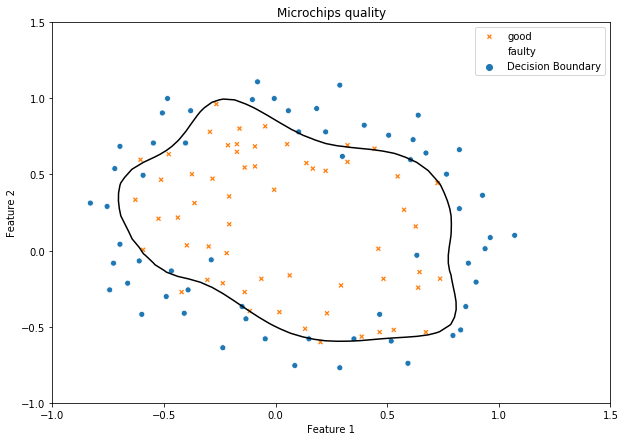

In [383]:
# get positive and negative samples for plotting
pos = data['y'] == 1
neg = data['y'] == 0
# Plot Decision boundary
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.scatterplot(x = 'x1', y= 'x2', hue="y", style="y", data = data)
ax.set(xlabel='Microchip Test 1', ylabel='Microchip Test 2', title='Microchips quality')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plotDecisionBoundary(res_theta, 6, ax);

In [426]:
def plots_bound (x, y, lambd, res_theta, degree, axes):
    X_pol = mapFeature(X1=x[:, 0], X2= x[:, 1], degree = degree)
    m, n = X_pol.shape
    initial_theta = np.zeros((n, 1))
    with_ortimisation = op.fmin_tnc(func = costFunctionReg,
                                     x0 = initial_theta, 
                                     args = (X_pol, y.flatten(), lambd), 
                                     fprime = gradReg,
                                   )

    res_theta = with_ortimisation[0]

    # get positive and negative samples for plotting
    pos = data['y'] == 1
    neg = data['y'] == 0
    # Plot Decision boundary
    fig, ax = plt.subplots(figsize = (10,7))
    ax = sns.scatterplot(x = 'x1', y= 'x2', hue="y", style="y", data = data)
    ax.set(xlabel='Microchip Test 1', ylabel='Microchip Test 2', title='Microchips quality')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Degree - '+ str(degree) + ", " + 'Lambda - ' + str(lambd))

    plotDecisionBoundary(res_theta, degree, ax);

In [379]:
'degree' + str(1)

'degree1'

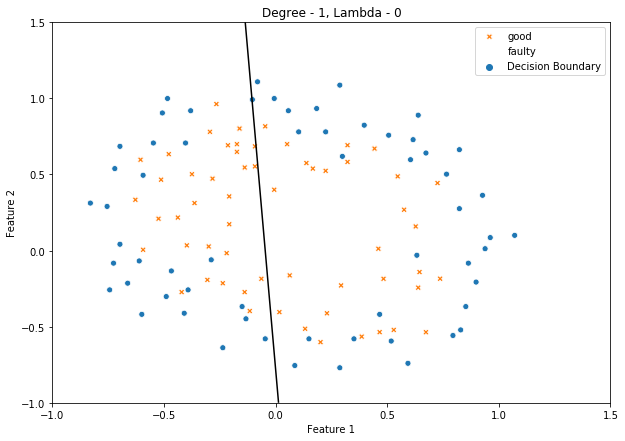

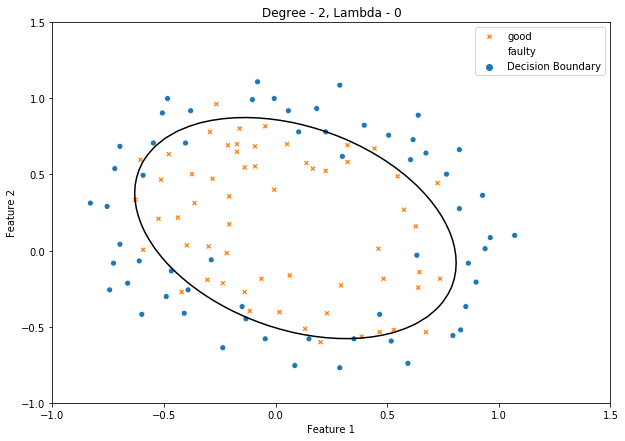

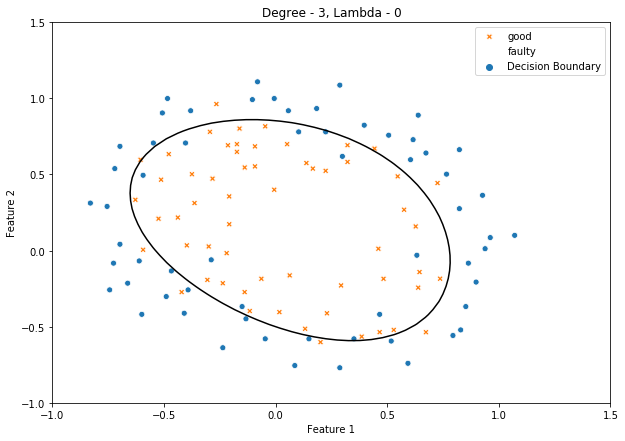

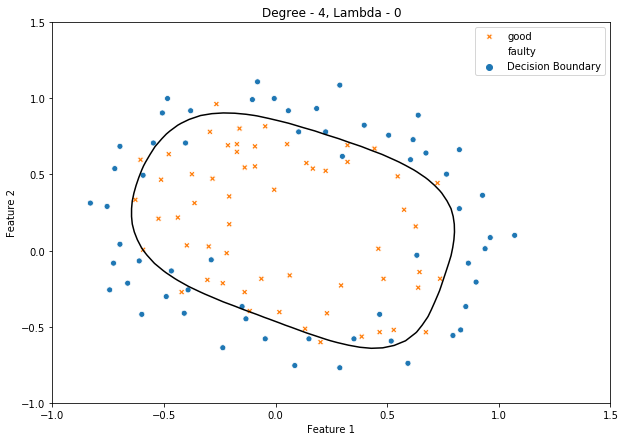

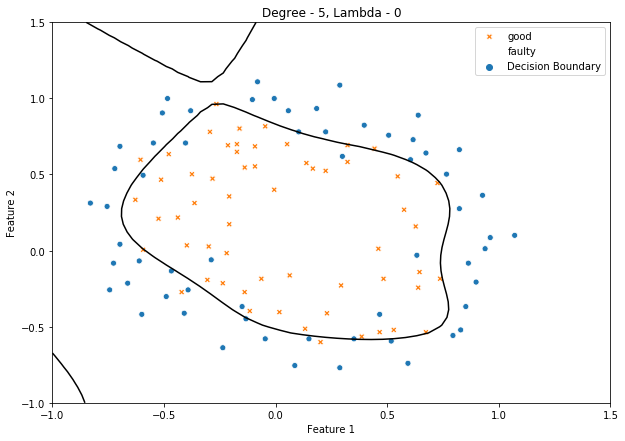

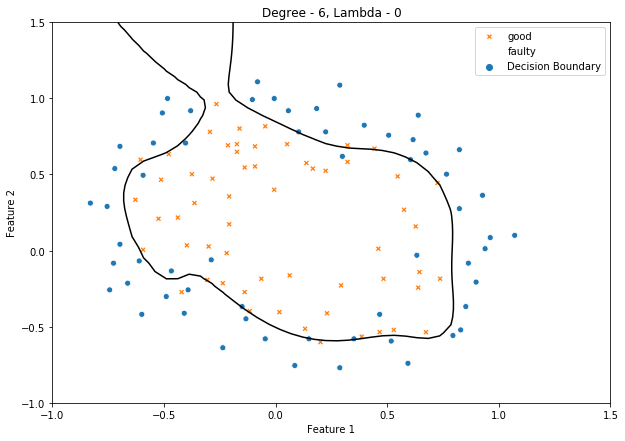

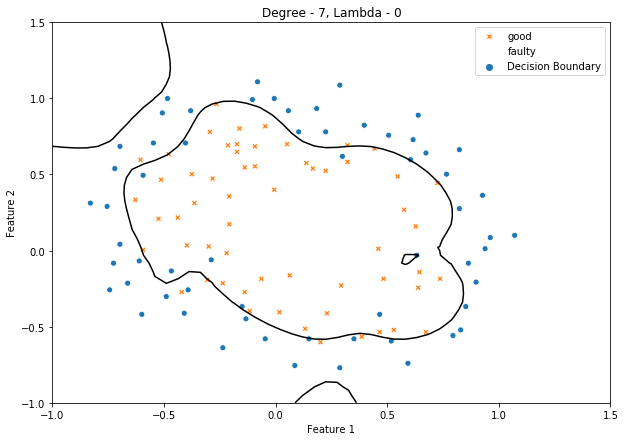

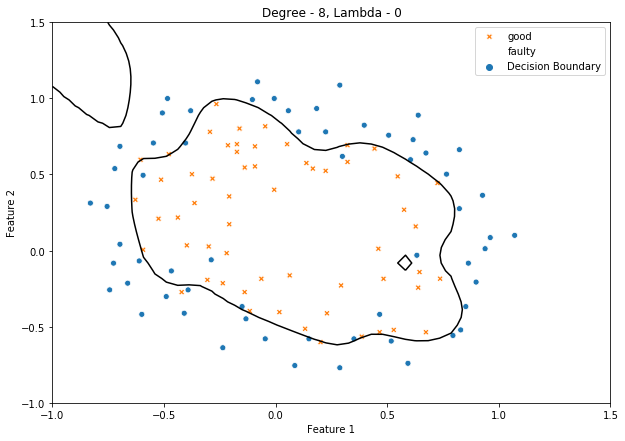

In [427]:
for i in range (1, 9):
    plots_bound(x = X, y = y, lambd = 0,  res_theta = res_theta, degree = i , axes =axes )

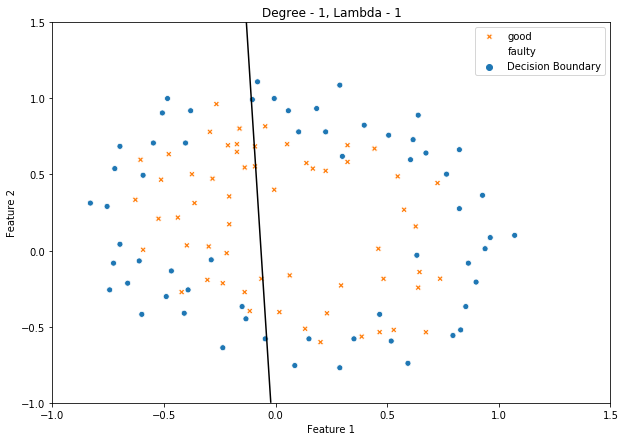

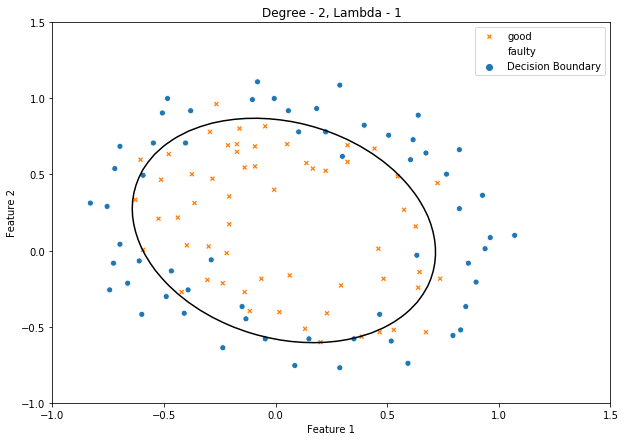

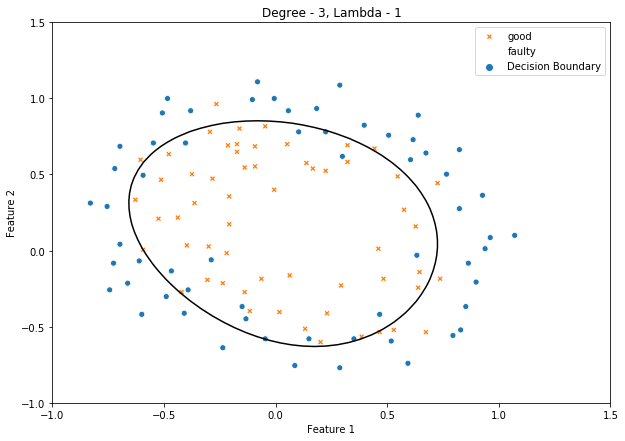

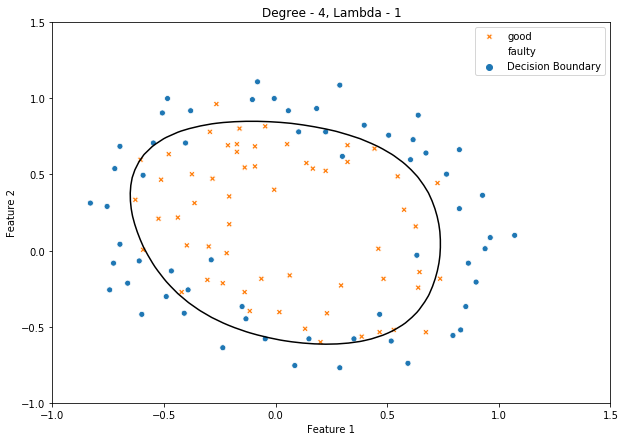

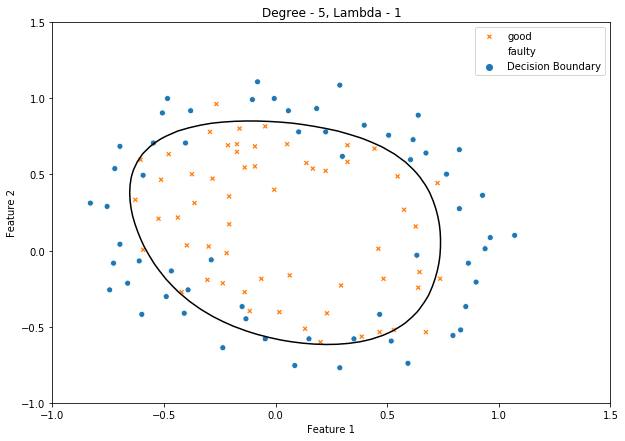

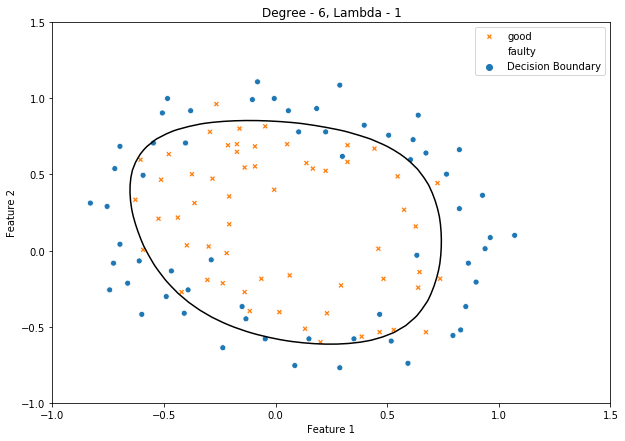

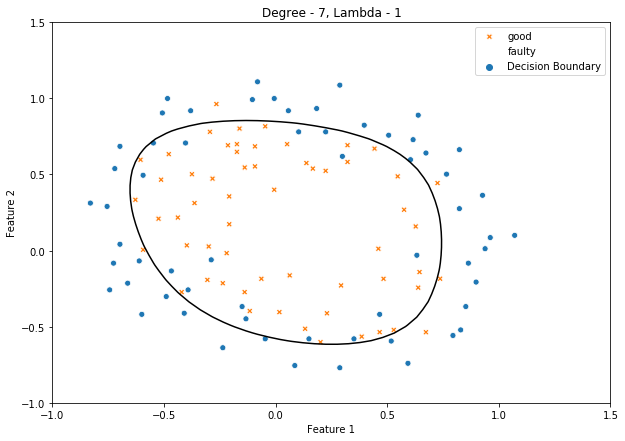

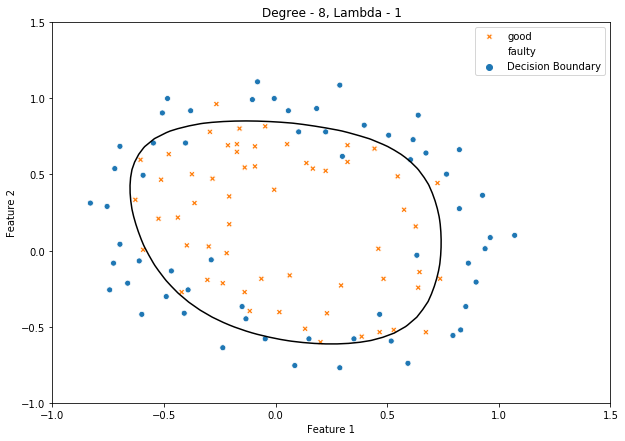

In [428]:
for i in range (1, 9):
    plots_bound(x = X, y = y, lambd = 1,  res_theta = res_theta, degree = i , axes =axes )

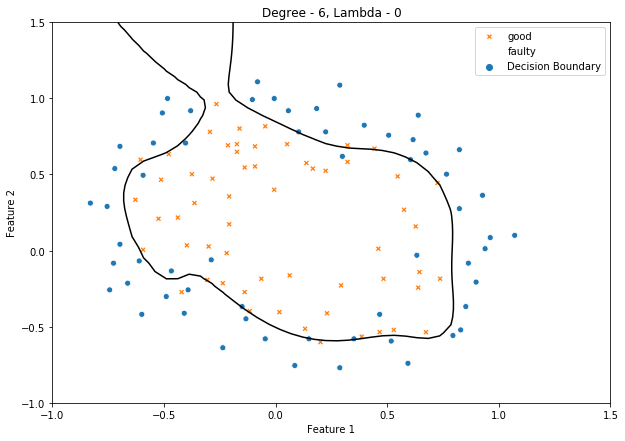

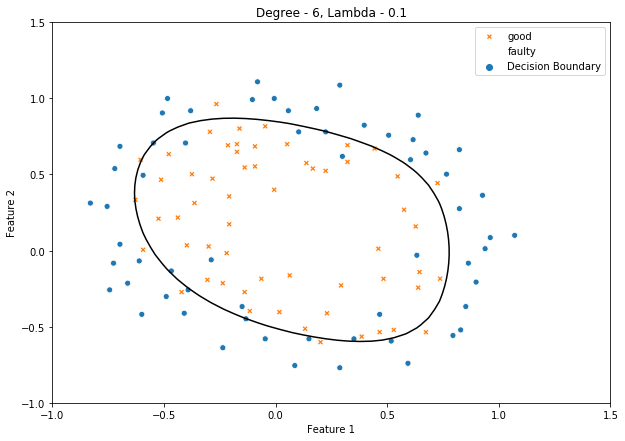

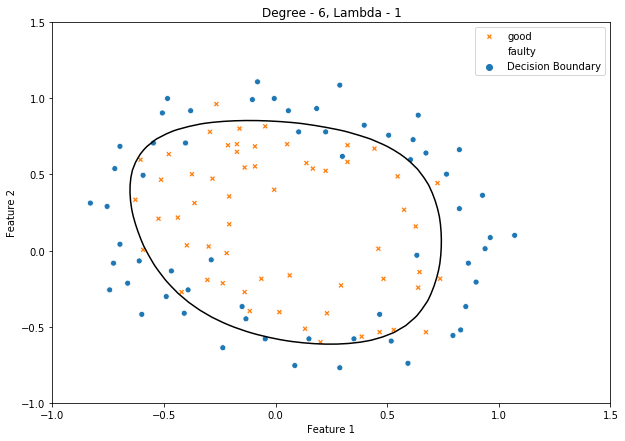

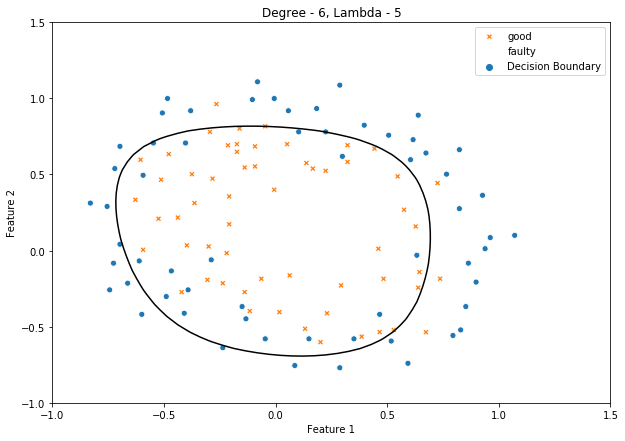

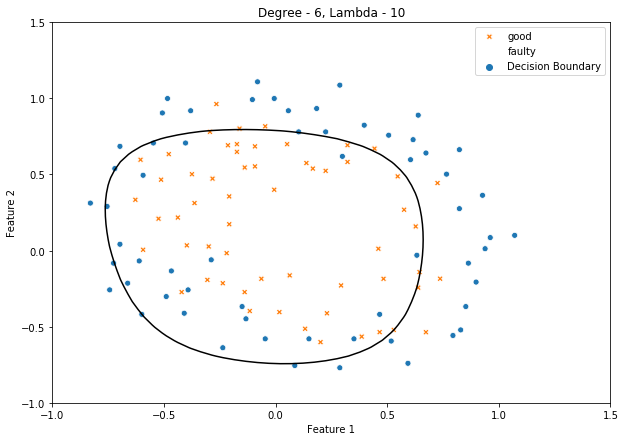

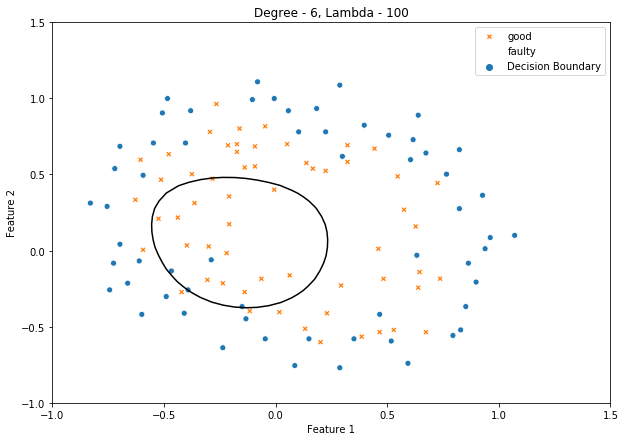

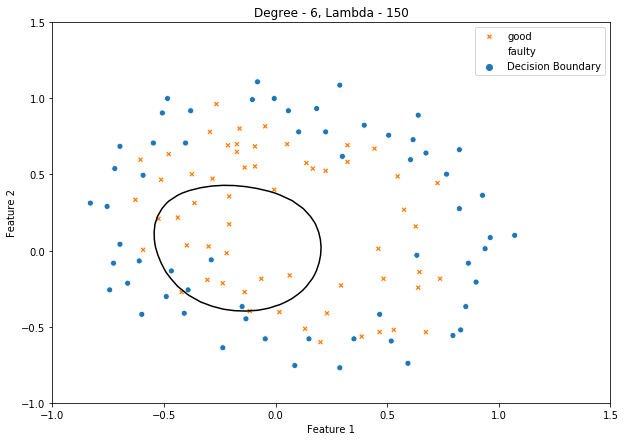

In [429]:
for i in list([0, .1, 1, 5, 10, 100, 150]):
    plots_bound(x = X, y = y, lambd = i, res_theta = res_theta, degree = 6, axes =axes )